# Aviation Accident Analysis

## Introduction

In this project, I have collected a dataset related to aviation accidents with the goal of gaining insights into the contributing factors of these incidents. The dataset includes information on various aspects, such as aircraft make and model, weather conditions, and the country where the accident occurred.

## Dataset Overview

- **Aircraft Make and Model:** Information about the specific make and model of the aircraft involved in each incident.
  
- **Weather Conditions:** Details on the weather conditions prevailing at the time of the accidents.

- **Country:** The country where the aviation accident took place.

## Exploratory Data Analysis (EDA)

### Aircraft Make and Model Analysis

I will begin by exploring the distribution of accidents across different aircraft makes and models. This analysis may reveal patterns or associations between certain types of aircraft and the frequency of accidents.

### Weather Conditions Analysis

Analyzing the impact of weather conditions on aviation accidents is crucial. EDA will involve examining the distribution of accidents under various weather conditions, identifying trends, and understanding the role of weather in incidents.


## Clustering Analysis

To further categorize and group similar incidents, I plan to apply clustering algorithms. Clustering can help identify patterns that might not be immediately apparent through traditional EDA.

### Approach

I will use clustering algorithms such as KMeans to group similar incidents based on multiple factors. This could lead to the identification of clusters with shared characteristics, helping in the categorization of accidents.

### Features for Clustering

The features considered for clustering may include aircraft make and model, weather conditions, and other relevant factors identified during the EDA process.

### Insights and Recommendations

The ultimate goal is to derive actionable insights from the clusters formed, allowing for better understanding, prevention, and management of aviation accidents.

## Conclusion

By combining both exploratory data analysis and clustering techniques, I aim to uncover hidden patterns within the dataset, providing a comprehensive understanding of aviation accidents and contributing factors.


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
file_path = r"C:\Users\LENOVO\Downloads\Aviation_Accidents.csv"
df = pd.read_csv(file_path, encoding='latin1',low_memory=False)



In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 88889 entries, 0 to 88888

Data columns (total 31 columns):

 #   Column                  Non-Null Count  Dtype  

---  ------                  --------------  -----  

 0   Event.Id                88889 non-null  object 

 1   Investigation.Type      88889 non-null  object 

 2   Accident.Number         88889 non-null  object 

 3   Event.Date              88889 non-null  object 

 4   Location                88837 non-null  object 

 5   Country                 88663 non-null  object 

 6   Latitude                34382 non-null  object 

 7   Longitude               34373 non-null  object 

 8   Airport.Code            50249 non-null  object 

 9   Airport.Name            52790 non-null  object 

 10  Injury.Severity         87889 non-null  object 

 11  Aircraft.damage         85695 non-null  object 

 12  Aircraft.Category       32287 non-null  object 

 13  Registration.Number     87572 non-null  object 

 14  Make               

In [6]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [7]:
df.shape

(88889, 31)

In [72]:
# Dropping the columns having more missing values
thershold=0.3
missing_counts= df.isna().sum()
total_row= len(df)
drop_col= [i for i in df.columns if missing_counts[i]/total_row > thershold]
df.drop(columns=drop_col,inplace=True)
df.shape

(88889, 22)

In [9]:
df2=df.copy()
df.drop('Publication.Date',axis=1,inplace=True)

In [10]:
d={}
for i in df.columns:
    d[i]=len(df[i].unique())
unique_values= pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])
unique_values["missing_values"]= df.isna().sum().values
unique_values

,Column,unique_val,missing_values
0,Event.Id,84468,0
1,Investigation.Type,2,0
2,Accident.Number,88863,0
3,Event.Date,14782,0
4,Location,27759,52
5,Country,220,226
6,Injury.Severity,110,1000
7,Aircraft.damage,5,3194
8,Registration.Number,79106,1317
9,Make,8238,63


In [73]:
# dropping rows having more missing values
subset_col=list(unique_values[unique_values['missing_values']>1000]['Column'])
df.dropna(subset=subset_col, inplace=True)
df.shape
    

(63325, 22)

In [12]:
df.isna().sum()

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Location                   15
Country                   198
Injury.Severity            11
Aircraft.damage             0
Registration.Number         0
Make                        8
Model                      23
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Report.Status               0
dtype: int64

In [13]:
# Handeling Null values
l2=['Location','Country','Injury.Severity','Model','Make']
for i in l2:
        df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [68]:
pd.set_option('display.max_columns', None)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,1962
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,1977
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause,1981
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,1982


In [69]:
obj_col= df.select_dtypes(include='object').columns
for i in obj_col:
    df[i]= df[i].str.strip()

df[obj_col].head()

,Event.Id,Investigation.Type,Accident.Number,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108,No,Reciprocating,Personal,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24,No,Reciprocating,Personal,UNK,Probable Cause
3,20001218X45448,Accident,LAX96LA321,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,Reciprocating,Personal,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,Reciprocating,Personal,IMC,Probable Cause
7,20020909X01562,Accident,SEA82DA022,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,Reciprocating,Personal,VMC,Probable Cause


In [16]:
# cleaning colmns one by one

df['Make']=df['Make'].str.title()
df['Make'].replace('[!@#$%^&*()_+{}|:"<>,-./?`~=;0123456789]', '', regex=True, inplace=True)    
len(df['Make'].unique())
df['Make']= df['Make'].str.strip()
len(df['Make'].unique())

5653

In [19]:
def str_clean(row):
    parts = row.split(" ", 2)
    if len(parts) > 1:
        return parts[0]
    else:
        return row
df['Make']=df["Make"].apply(str_clean)

In [23]:
df['Model'] = df['Model'].apply(lambda x: x.upper())
df['Model'] = df['Model'].str.replace('-', ' ')
df['Model'] = df['Model'].apply(str_clean)
#df['Model'].value_counts().sort_values(ascending=False)


In [24]:
pd.set_option('display.max_columns', None)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
6,20001218X45446,Accident,CHI81LA106,8/1/1981,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1/1/1982,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause


For above data cleaning we have seen that there are some top make that is incolved in accident of aircraft 
there can be the many reason for this we will further evaluate which model of our top makes is cause for accident
type of engine, weather and location of accident is that a/c is Amateur.Built or not this will give us clear understanding


In [25]:
class AircraftAccidentVisualizer:
    def __init__(self, data):
        self.data = data

    def visualize_top_10_models_by_make(self):
        top_10_makes = self.data['Make'].value_counts().head(10).index

        for make in top_10_makes:
            make_data = self.data[self.data['Make'] == make]
            top_10_models = make_data['Model'].value_counts().head(10)
            top_10_models.plot(kind='bar', title=f'Top 10 Models for {make} Aircraft in Accidents')
            plt.xlabel('Model')
            plt.ylabel('Number of Accidents')
            plt.show()

    def visualize_weather(self):
        weather_counts = self.data['Weather.Condition'].value_counts()
        weather_counts.plot(kind='bar', title='Weather Conditions in Aircraft Accidents')
        plt.xlabel('Weather Conditions')
        plt.ylabel('Number of Accidents')
        plt.show()
        
    def visulize_engines(self):
        engine_weather_counts = self.data.groupby(['Engine.Type', 'Weather.Condition']).size().reset_index(name='Count')
        plt.figure(figsize=(20,12))
        sns.barplot(x= 'Engine.Type', y= 'Count',hue='Weather.Condition',data=engine_weather_counts)
        plt.xlabel('Type of Eng.')
        plt.ylabel('Count of Engine')
        plt.title('Count of Engine Types by Weather Condition')
        plt.legend(title='Weather Condition', loc='upper right')



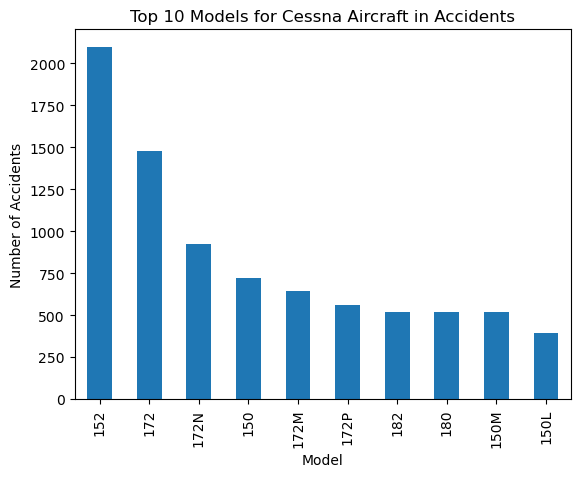

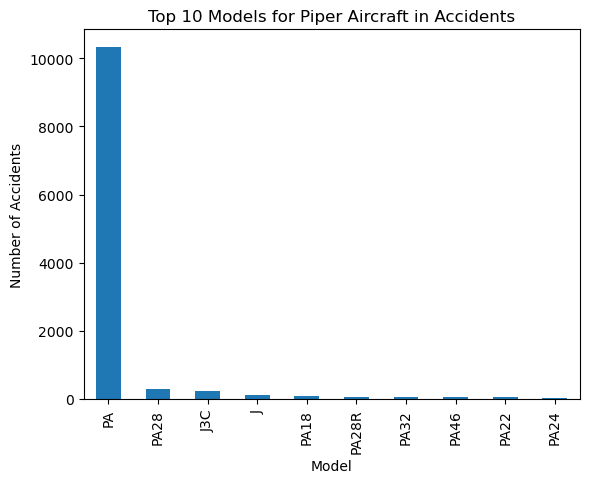

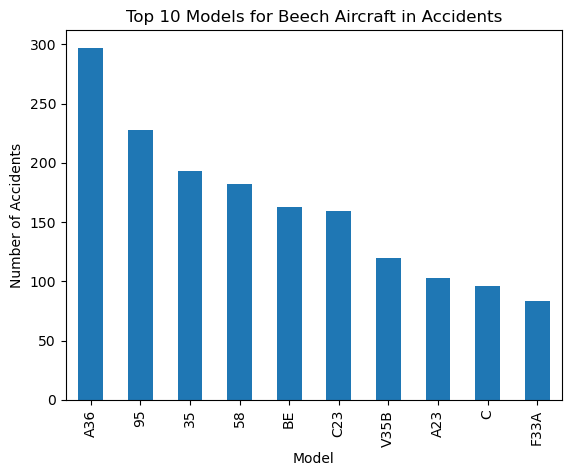

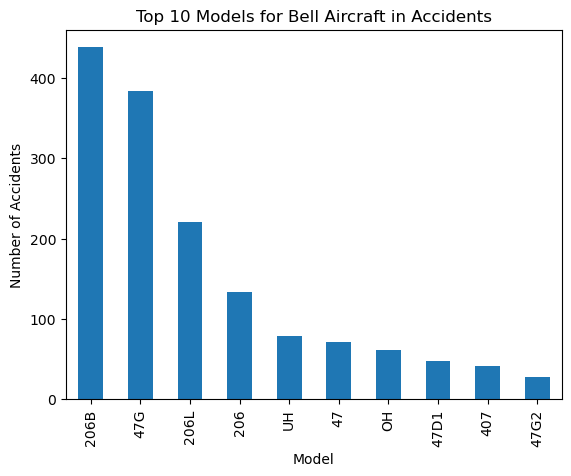

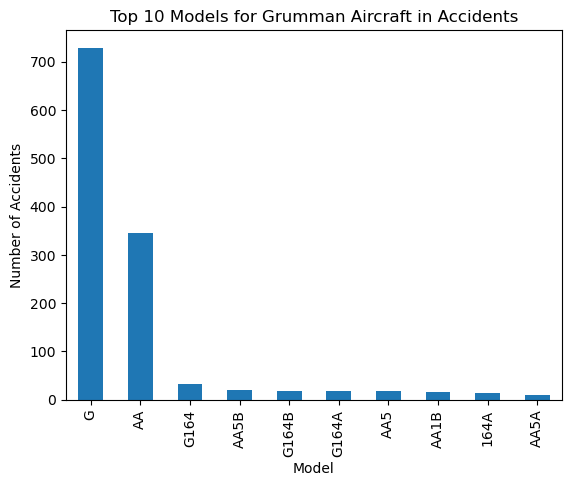

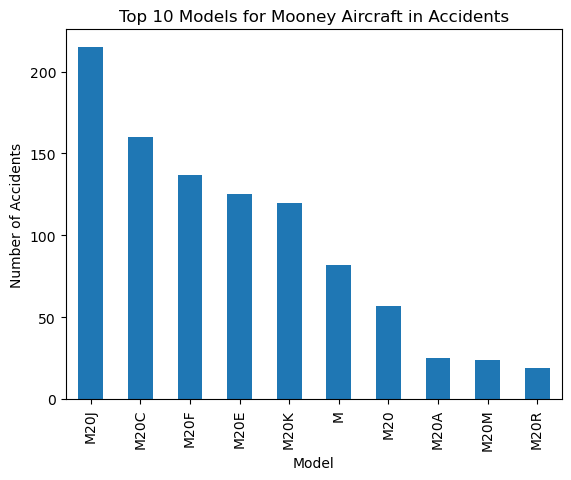

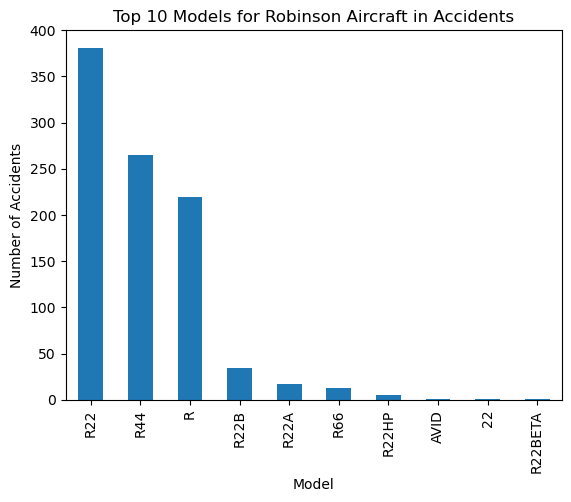

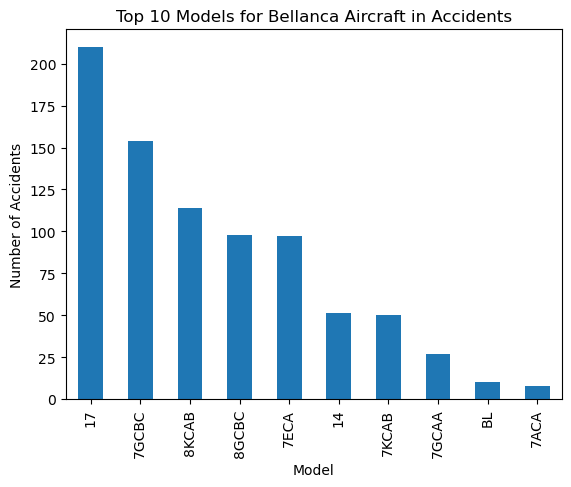

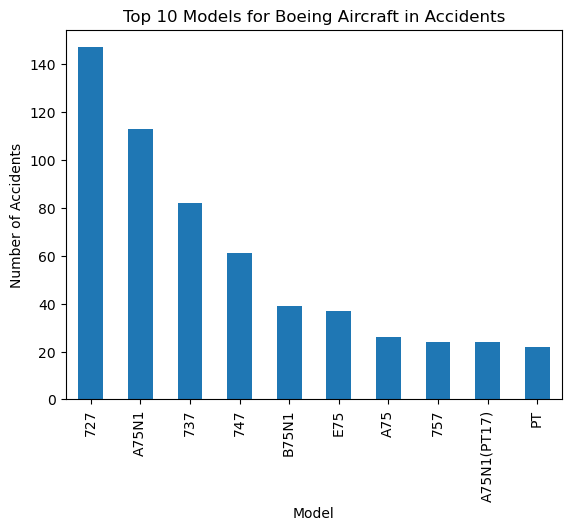

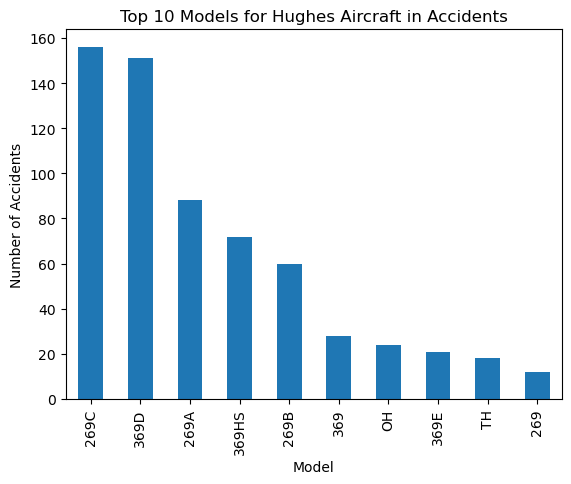

In [26]:

visulizer= AircraftAccidentVisualizer(df)
visulizer.visualize_top_10_models_by_make()

Breaking down the data,
we first identify top Aircraft makes makes with notable accident involvement. Within each of these makes, 
we then pinpoint the primary models that consistently stand out in terms of incidents. This layered appr-
oach provides a comprehensive and nuanced understanding of the overall data landscape.


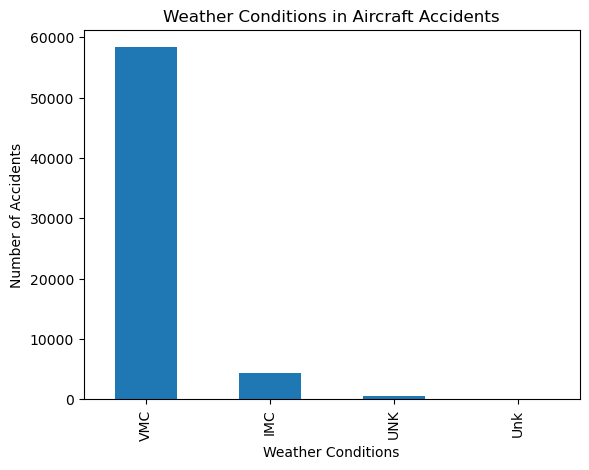

In [27]:
visulizer.visualize_weather()

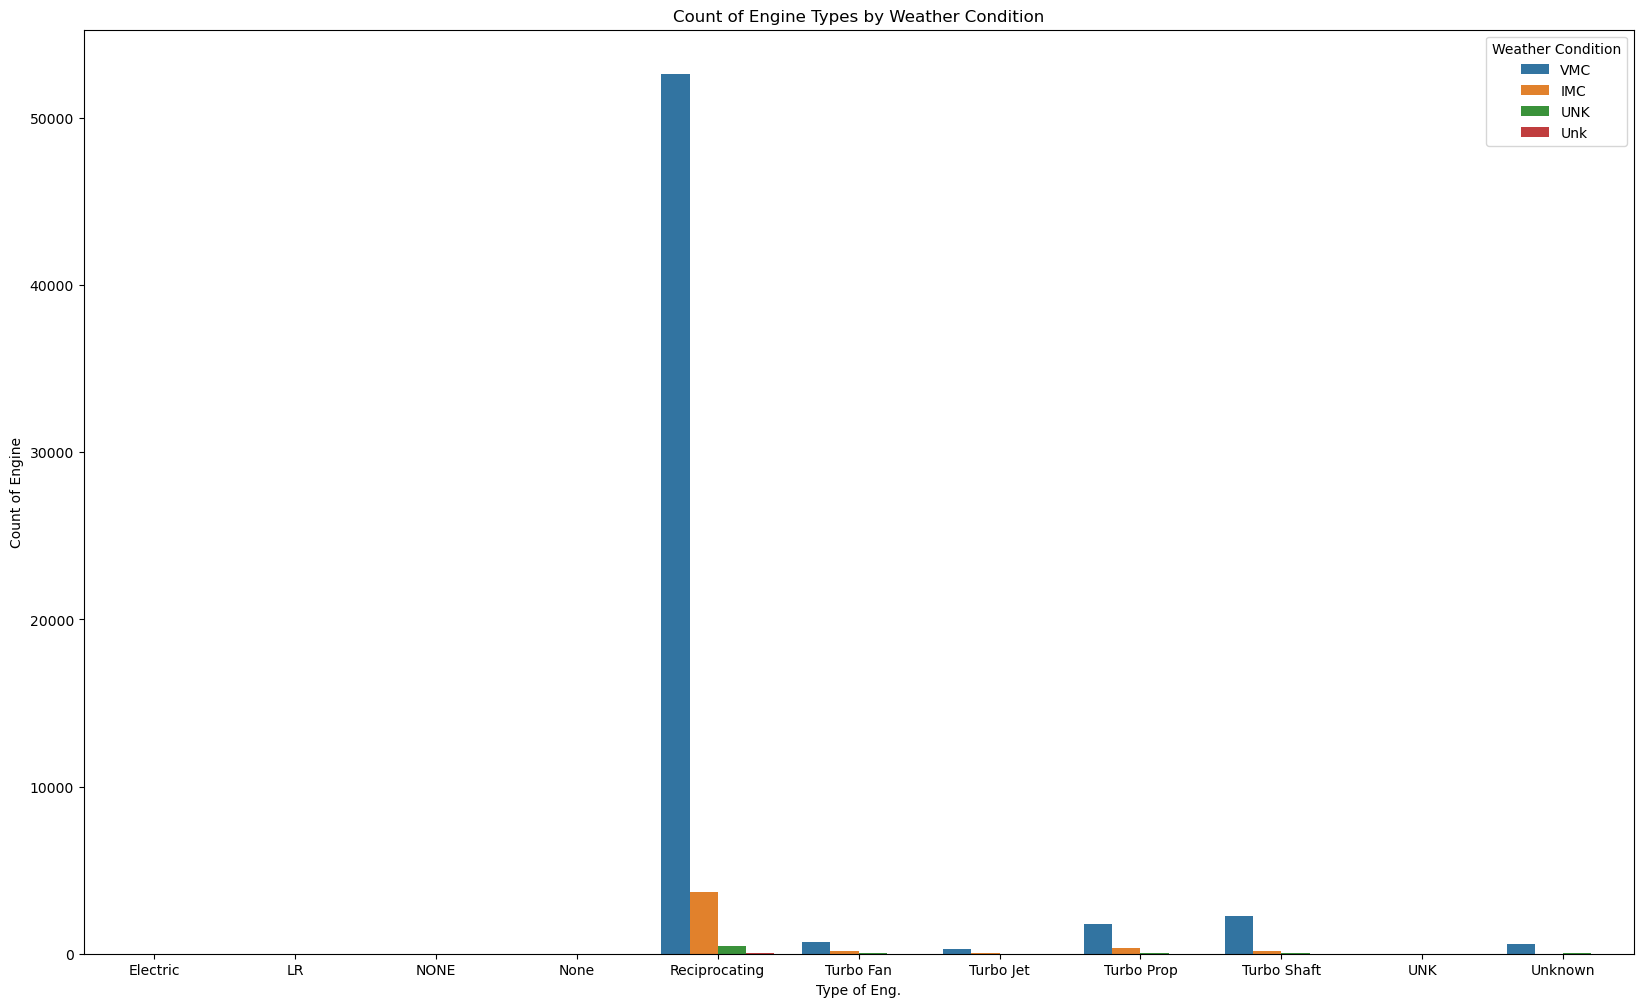

In [28]:
visulizer.visulize_engines()

In [29]:
df["Event.Date"]=pd.to_datetime(df["Event.Date"])
df['year']= df["Event.Date"].dt.year


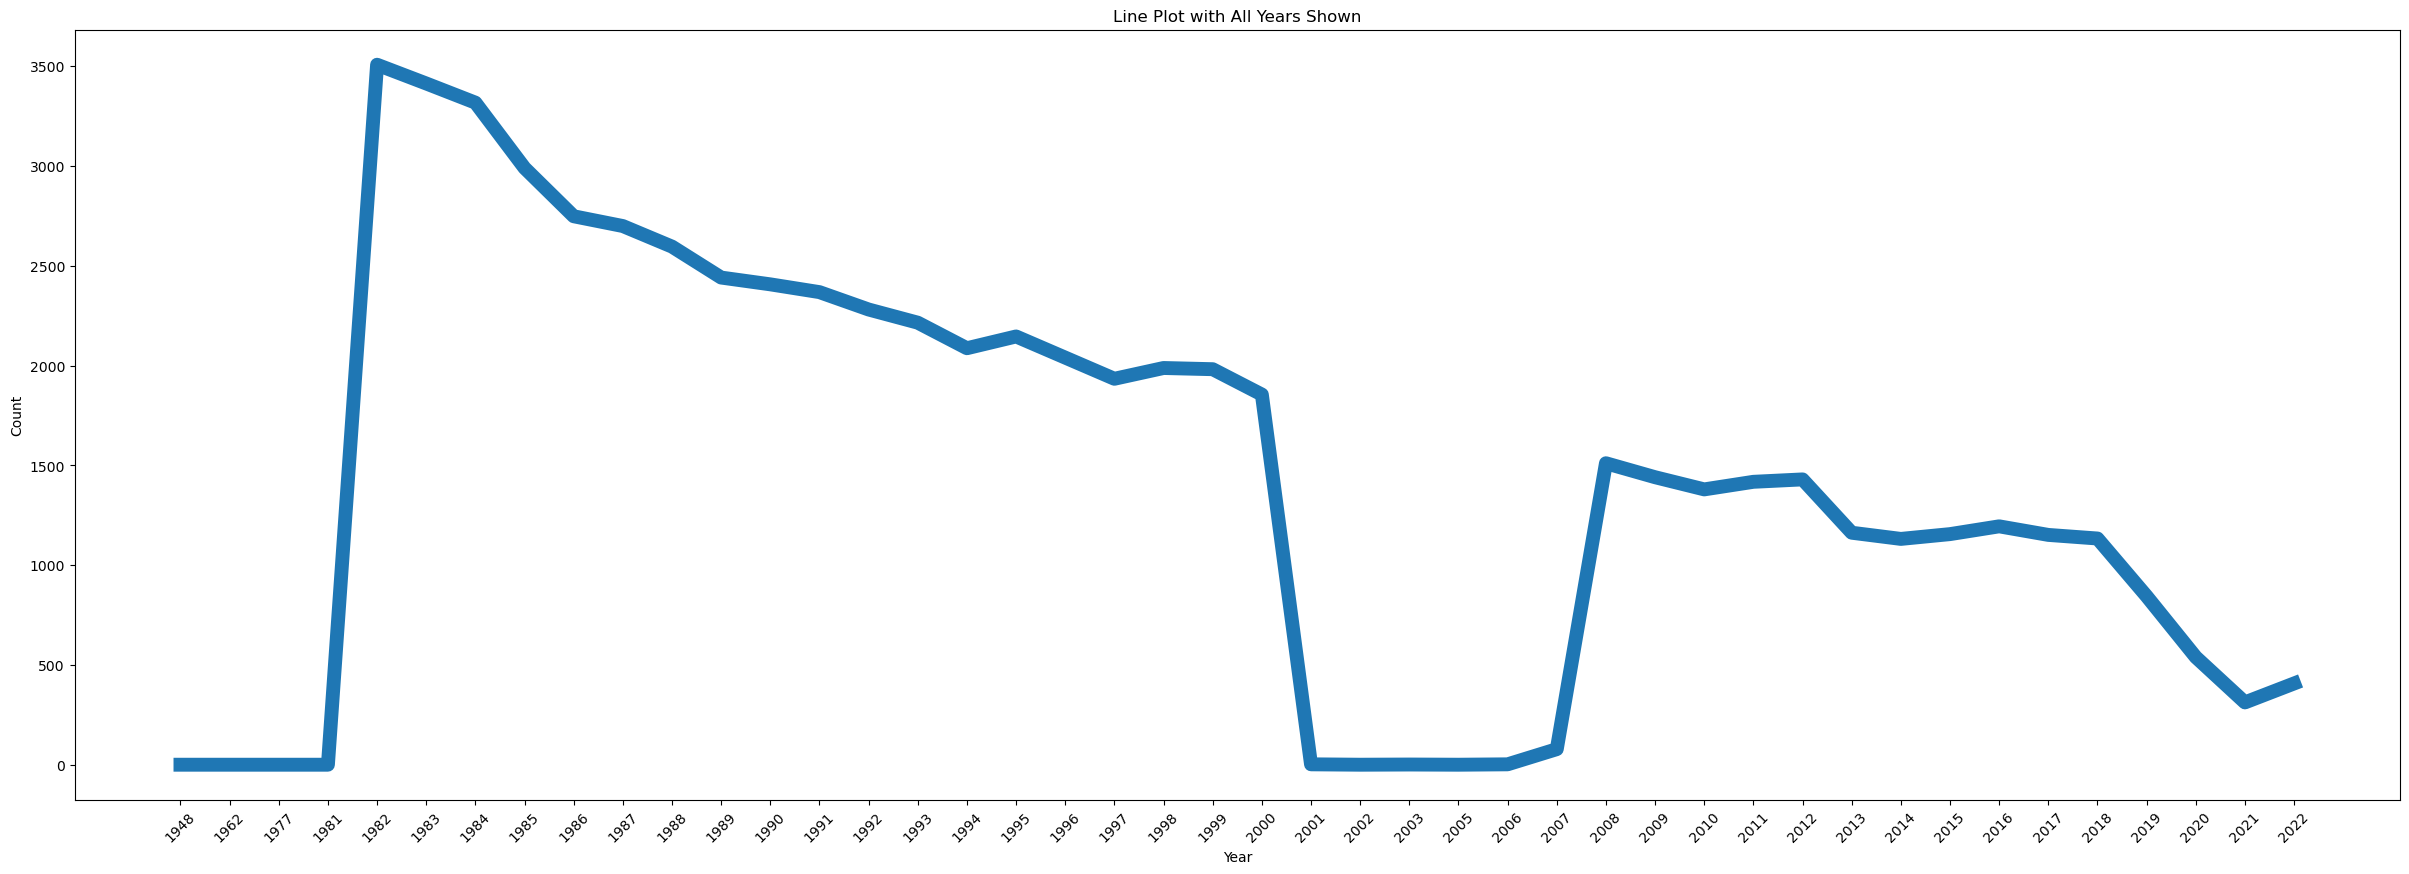

In [30]:
plt.figure(figsize=(30,10))
year_data=df["year"].value_counts().sort_index()
x_= year_data.index.astype(str)
y_ = year_data.values
sns.lineplot(x=x_, y=y_,sort=False,markers=True, linewidth=10)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot with All Years Shown')
plt.show()

In [32]:
top10_model=df["Make"].value_counts().head(10)
top10_model.index

Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Grumman', 'Mooney', 'Robinson',
       'Bellanca', 'Boeing', 'Hughes'],
      dtype='object')

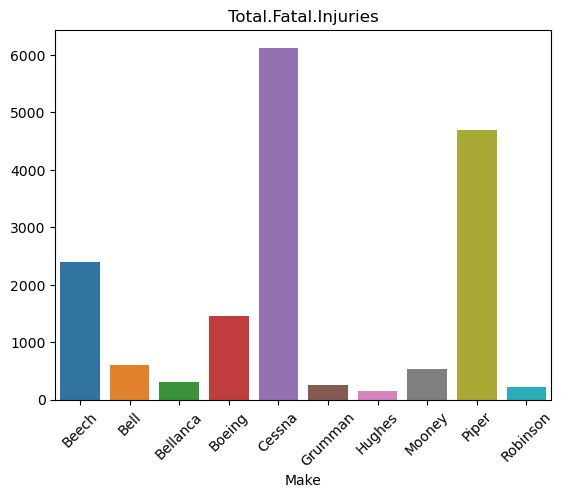

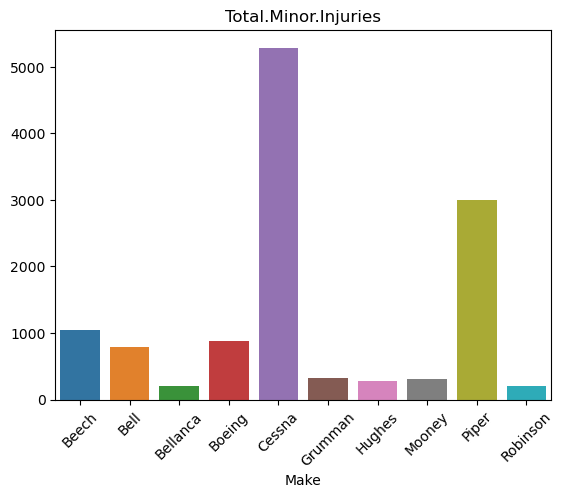

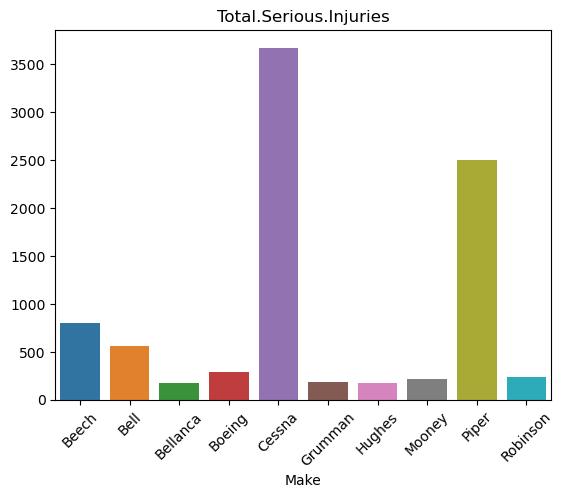

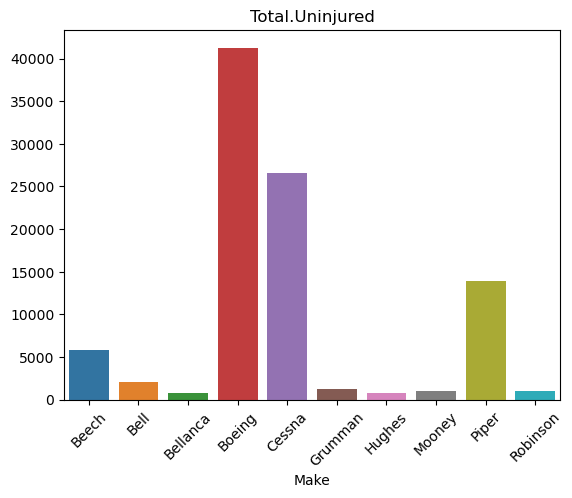

In [33]:
injuries= ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_selected = df[['Make'] + ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
top_10_make_injuries= df_selected[df['Make'].isin(top10_model.index)]
inj_pivot= pd.pivot_table(top_10_make_injuries,values=injuries,columns='Make',aggfunc='sum')
for i in range(0,len(inj_pivot)):
    sns.barplot(x=inj_pivot.iloc[i].index,y=inj_pivot.iloc[i].values)
    plt.title(inj_pivot.index[i])
    plt.xticks(rotation=45)
    plt.show()


This data suggests that, despite a higher incidence of injuries in Cessna accidents, 
passengers aboard Boeing aircraft experienced a significantly higher likelihood of survival. 
This insight contributes to the overall assessment of travel safety.

In [34]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,1962
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,1977
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Probable Cause,1981
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,1982


In [35]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'year'],
      dtype='object')

In [1]:
cluster_df = df[["Make", "Model", "Weather.Condition", "Amateur.Built", "Engine.Type", "Number.of.Engines","Country"]]


NameError: name 'df' is not defined

In [41]:
from sklearn.cluster import KMeans
x = pd.get_dummies(cluster_df)
wss = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(x)
    wss.append(kmeans.inertia_)


In [52]:
wss

[158419.90193446435,
 139229.293360406,
 124386.28268994304,
 117496.51048945333,
 113665.3082959364,
 103500.64780818525,
 102251.51593584058,
 95755.41203594778,
 97174.14954210614,
 92627.32730431414]

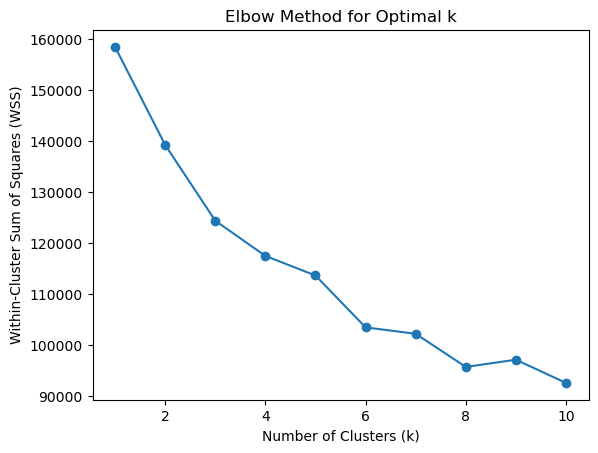

In [51]:
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In selecting the optimal number of clusters from the elbow curve analysis, we determine that 8 clusters offer a balanced and effective segmentation for our data. This decision is based on the point of inflection in the elbow curve, indicating a meaningful division without unnecessary complexity.

In [55]:

x = pd.get_dummies(cluster_df)

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(x)

print(cluster_df.head())

       Make Model Weather.Condition Amateur.Built    Engine.Type  \

0   Stinson   108               UNK            No  Reciprocating   

1     Piper  PA24               UNK            No  Reciprocating   

3  Rockwell   112               IMC            No  Reciprocating   

6    Cessna   180               IMC            No  Reciprocating   

7    Cessna   140               VMC            No  Reciprocating   



   Number.of.Engines        Country  Cluster  

0                1.0  United States        0  

1                1.0  United States        2  

3                1.0  United States        0  

6                1.0  United States        1  

7                1.0  United States        1  


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16656\3128081704.py:6: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cluster_df['Cluster'] = kmeans.fit_predict(x)


Text(0.5, 1.0, 'Clustering classification')

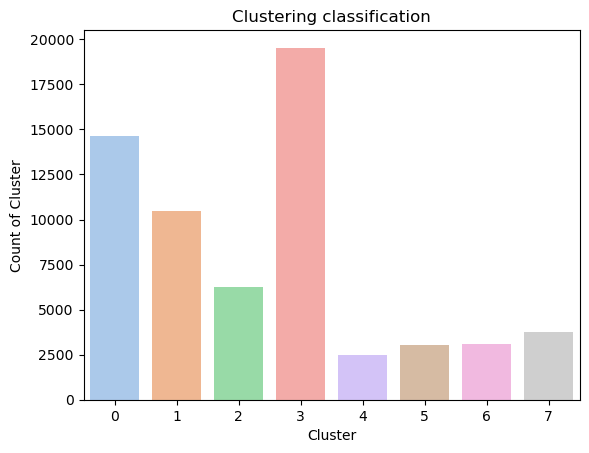

In [65]:
cluster_classification= cluster_df['Cluster'].value_counts()
sns.barplot(x=cluster_classification.index,y= cluster_classification.values,palette=colors)
plt.xlabel("Cluster")
plt.ylabel("Count of Cluster")
plt.title("Clustering classification")


## In our aviation accident project, we methodically examined data, identifying top makes and models involved in incidents. Through the elbow curve analysis, we discerned that utilizing 8 clusters provides a well-balanced segmentation for comprehensive insights into the accident patterns within the aviation dataset. This approach enhances our understanding and facilitates more effective analysis of the data.